In [2]:
# Import packages and data.
from collections.abc import Iterable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
#import plotly.graph_objects as go
df = pd.read_csv('GBRTENW.Mx_5x1.txt', delim_whitespace = True, skiprows = 2)
df.head(24)

,Year,Age,Female,Male,Total
0,1841,0,0.136067,0.169189,0.152777
1,1841,1-4,0.035751,0.037354,0.036548
2,1841,5-9,0.009277,0.009614,0.009446
3,1841,10-14,0.005401,0.005107,0.005252
4,1841,15-19,0.007967,0.007168,0.007574
5,1841,20-24,0.008955,0.009230,0.009084
6,1841,25-29,0.009988,0.009843,0.009919
7,1841,30-34,0.010247,0.009740,0.010002
8,1841,35-39,0.012524,0.012056,0.012294
9,1841,40-44,0.012005,0.012407,0.012202


In [3]:
df.columns

Index(['Year', 'Age', 'Female', 'Male', 'Total'], dtype='object')

### Data cleaning

In [4]:
# Are there any null values?
df.isnull().sum()

Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

In [5]:
# I'm not sure. Look at this:
df.iloc[23, :]

Year      1841
Age       110+
Female       .
Male         .
Total        .
Name: 23, dtype: object

In [6]:
# Unsurprisingly...
df.Total.dtype

dtype('O')

In [7]:
# The trouble is, this also affects the other values in these columns.
df.loc[0, 'Total']

'0.152777'

In [8]:
# Beating a dead horse now...
type(df.loc[0, 'Total'])

str

In [9]:
# Those '.' values are probably really zeroes, in the sense that there was no-one aged over 110 to die. But I think it's a
# better option to declare them missing, so that we can then cast to float.
df.replace('.', np.nan, inplace = True)

In [10]:
# Now...
df.iloc[23, :]

Year      1841
Age       110+
Female     NaN
Male       NaN
Total      NaN
Name: 23, dtype: object

In [11]:
# It seems to have worked. Now let's cast.
df.Female = df.Female.apply(float)
df.Male = df.Male.apply(float)
df.Total = df.Total.apply(float)

In [12]:
# And check...
df.Total.dtype

dtype('float64')

In [13]:
df.loc[0, 'Total']

0.152777

In [14]:
# That's cleaned up our data nicely. Although, paradoxically, we now have more 'null' values:
df.isnull().sum()

Year        0
Age         0
Female    130
Male      186
Total     128
dtype: int64

In [15]:
# Just let's remind ourselves of how big this dataset is.
len(df.index)

4320

In [16]:
null_df = df[(np.isnan(df.Female)) | (np.isnan(df.Male)) | (np.isnan(df.Total))]
null_df

,Year,Age,Female,Male,Total
23,1841,110+,NaN,NaN,NaN
47,1842,110+,NaN,NaN,NaN
71,1843,110+,NaN,NaN,NaN
95,1844,110+,NaN,NaN,NaN
119,1845,110+,NaN,NaN,NaN
...,...,...,...,...,...
3815,1999,110+,1.399009,NaN,1.399009
3839,2000,110+,1.127820,NaN,1.127820
3863,2001,110+,1.132075,NaN,1.132075
3887,2002,110+,1.738372,NaN,1.738372


In [17]:
# Sanity check.
null_df.Age.unique()

array(['110+', '105-109'], dtype=object)

In [18]:
# Ooh, interesting.
null_df[null_df.Age == '105-109']

,Year,Age,Female,Male,Total
670,1868,105-109,1.219048,NaN,1.219048
982,1881,105-109,1.300971,NaN,1.300971
1006,1882,105-109,1.371429,NaN,1.371429
1030,1883,105-109,1.246050,NaN,1.246050
1270,1893,105-109,1.951557,NaN,1.951557
1294,1894,105-109,1.379032,NaN,1.379032
1318,1895,105-109,0.940678,NaN,0.940678
1342,1896,105-109,1.356110,NaN,1.356110
1366,1897,105-109,1.815652,NaN,1.815652
1390,1898,105-109,1.718062,NaN,1.718062


In [19]:
len(null_df[null_df.Age == '105-109'].index)

26

In [20]:
df[(df.Female > 1) & (df.Age == '110+')]

,Year,Age,Female,Male,Total
3119,1970,110+,1.935484,NaN,1.935484
3239,1975,110+,1.948052,NaN,1.948052
3311,1978,110+,1.022147,NaN,1.022147
3335,1979,110+,1.022147,NaN,1.022147
3383,1981,110+,1.646091,NaN,1.646091
3407,1982,110+,1.948052,NaN,1.948052
3455,1984,110+,2.120141,NaN,2.120141
3479,1985,110+,4.109589,NaN,4.109589
3599,1990,110+,2.631579,NaN,2.631579
3815,1999,110+,1.399009,NaN,1.399009


In [21]:
# Now I want to drop the older age categories with null values and implausible death rates.
df = df[df['Age'] != '110+']
df = df[df['Age'] != '105-109']

# I also want to get deaths/1000 population.
df.Female = df.Female.apply(lambda x: x * 1000)
df.Male = df.Male.apply(lambda x: x * 1000)
df.Total = df.Total.apply(lambda x: x * 1000)
df.head(24)

,Year,Age,Female,Male,Total
0,1841,0,136.067,169.189,152.777
1,1841,1-4,35.751,37.354,36.548
2,1841,5-9,9.277,9.614,9.446
3,1841,10-14,5.401,5.107,5.252
4,1841,15-19,7.967,7.168,7.574
5,1841,20-24,8.955,9.230,9.084
6,1841,25-29,9.988,9.843,9.919
7,1841,30-34,10.247,9.740,10.002
8,1841,35-39,12.524,12.056,12.294
9,1841,40-44,12.005,12.407,12.202


###  Data stories

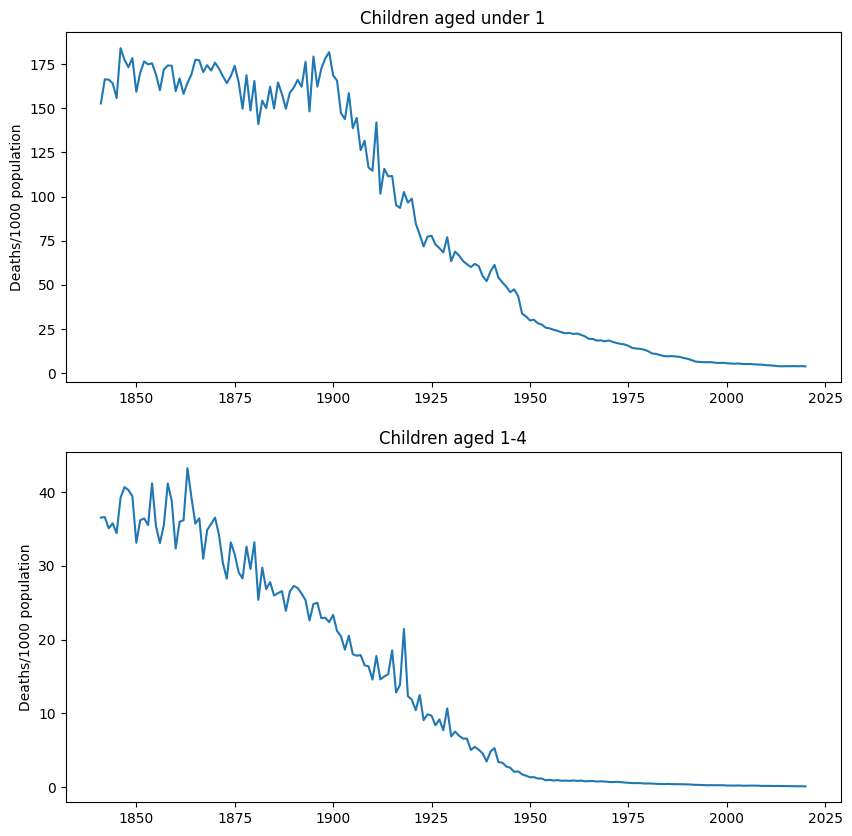

In [22]:
infant_mortality = df[df['Age'] == '0']
childhood_mortality = df[df['Age'] == '1-4']

fig, ax = plt.subplots(2, 1, figsize = (10, 10))

ax[0].plot('Year', 'Total', data = infant_mortality)
ax[1].plot('Year', 'Total', data = childhood_mortality)

ax[0].set_title("Children aged under 1")
ax[0].set_ylabel('Deaths/1000 population')
ax[1].set_title("Children aged 1-4")
ax[1].set_ylabel('Deaths/1000 population')

plt.savefig('childhood_mortality.png', bbox_inches = 'tight')

plt.show()

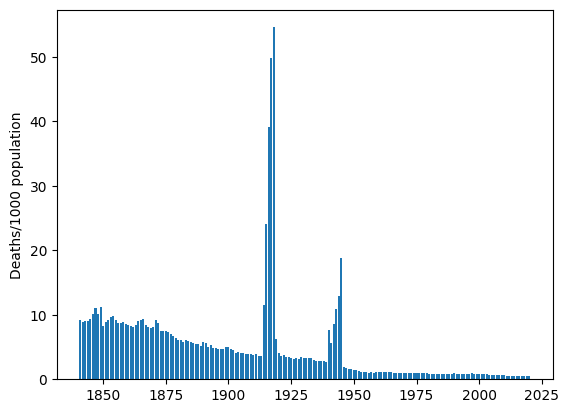

In [23]:
# What about fighting-age men?
young_men = df[df['Age'] == '20-24']

plt.bar('Year', 'Male', data = young_men)

#plt.title('Men aged 20-24')
plt.ylabel('Deaths/1000 population')

plt.savefig('young_men.png', bbox_inches = 'tight')

plt.show()

Yeah, the effect of the two world wars is pretty evident there. It's striking how much more of an effect WW1 had than WW2, though.

In [24]:
year_2019 = df[df.Year == 2019]
year_2019.head(24)

,Year,Age,Female,Male,Total
4272,2019,0,3.543,4.301,3.932
4273,2019,1-4,0.139,0.131,0.135
4274,2019,5-9,0.067,0.068,0.068
4275,2019,10-14,0.071,0.103,0.088
4276,2019,15-19,0.166,0.274,0.222
4277,2019,20-24,0.219,0.520,0.374
4278,2019,25-29,0.286,0.624,0.458
4279,2019,30-34,0.440,0.823,0.631
4280,2019,35-39,0.675,1.155,0.913
4281,2019,40-44,1.032,1.624,1.327


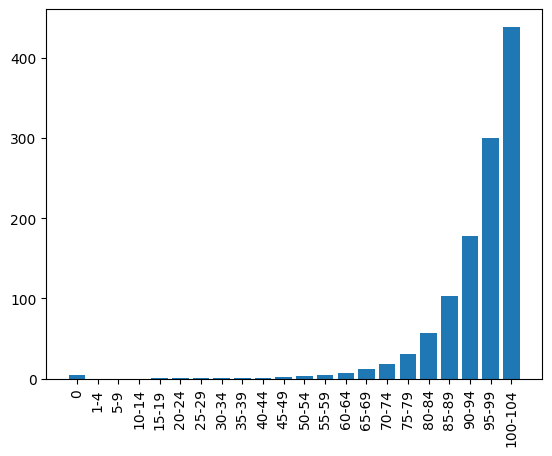

In [28]:
plt.bar('Age', 'Total', data = year_2019)
plt.xticks(rotation = 90)
plt.show()

C:\Users\MGotham\AppData\Local\Temp\ipykernel_23632\160180047.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(noughties.Total)


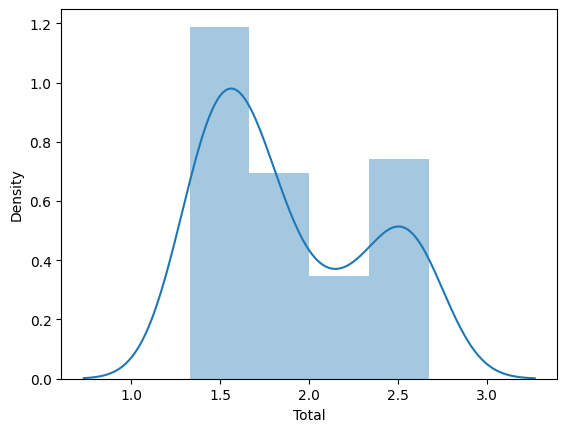

In [29]:
noughties = df[(df.Year > 1959) & (df.Year < 2020)]
noughties = noughties[noughties.Age == '40-44']
sns.distplot(noughties.Total)
plt.show()

In [30]:
age_bands = df.loc[0:23, 'Age'].values
sexes = ['Female', 'Male']

#def comparison_years(years):
#    if isinstance(years, Iterable):
#        start = years[0]
#        return range(start - 5, start)
#    else: # It's a single year rather than a range.
#        return range(years - 5, years)

ww1_years = range(1914, 1919)
ww1_comparison = range(1909, 1914)

spanish_years = range(1918, 1921)
spanish_comparison = ww1_comparison

ww2_years = range(1939, 1946)
ww2_comparison = range(1934, 1939)

covid_comparison = range(2015, 2020)

len(age_bands)

22

In [31]:
# First World War
ww1 = df[['Year', 'Age', 'Female', 'Male']][(df.Year >= ww1_years[0]) & (df.Year <= ww1_years[-1])].copy()
ww1

,Year,Age,Female,Male
1752,1914,0,98.204,124.492
1753,1914,1-4,14.935,15.720
1754,1914,5-9,3.394,3.434
1755,1914,10-14,2.178,2.062
1756,1914,15-19,2.706,7.802
...,...,...,...,...
1865,1918,80-84,132.374,166.721
1866,1918,85-89,204.195,247.759
1867,1918,90-94,281.038,295.493
1868,1918,95-99,393.735,452.400


In [32]:
def get_comparison(years, age, sex):
    to_analyse = df[(df.Year >= years[0]) & (df.Year <= years[-1]) & (df.Age == age)][sex].values
    return (np.mean(to_analyse), np.std(to_analyse))

get_comparison(list(range(1909, 1914)), '0', 'Female')

(104.54779999999998, 12.468204576441632)

In [33]:
ww1['fem_comp_mean'] = [get_comparison(list(ww1_comparison), age, 'Female')[0] for age in ww1.Age]
ww1['fem_comp_std'] = [get_comparison(list(ww1_comparison), age, 'Female')[1] for age in ww1.Age]
ww1['Female_Z'] = [(val - mean) / std for val, mean, std in zip(ww1.Female, ww1.fem_comp_mean, ww1.fem_comp_std)]

ww1['mal_comp_mean'] = [get_comparison(list(ww1_comparison), age, 'Male')[0] for age in ww1.Age]
ww1['mal_comp_std'] = [get_comparison(list(ww1_comparison), age, 'Male')[1] for age in ww1.Age]
ww1['Male_Z'] = [(val - mean) / std for val, mean, std in zip(ww1.Male, ww1.mal_comp_mean, ww1.mal_comp_std)]

ww1

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
1752,1914,0,98.204,124.492,104.5478,12.468205,-0.508798,131.3456,13.798725,-0.496684
1753,1914,1-4,14.935,15.720,15.2386,1.239904,-0.244858,16.1160,1.251886,-0.316323
1754,1914,5-9,3.394,3.434,3.2372,0.169052,0.927526,3.2310,0.166348,1.220335
1755,1914,10-14,2.178,2.062,2.0302,0.066370,2.226914,1.9380,0.077874,1.592311
1756,1914,15-19,2.706,7.802,2.6794,0.076779,0.346448,2.9014,0.133765,36.635927
...,...,...,...,...,...,...,...,...,...,...
1865,1918,80-84,132.374,166.721,148.4066,7.254265,-2.210093,175.6192,7.972643,-1.116092
1866,1918,85-89,204.195,247.759,217.5328,5.610929,-2.377111,255.5298,5.041050,-1.541504
1867,1918,90-94,281.038,295.493,296.1402,17.008619,-0.887915,342.6292,25.928687,-1.817917
1868,1918,95-99,393.735,452.400,405.6142,41.408995,-0.286875,476.5160,85.452582,-0.282215


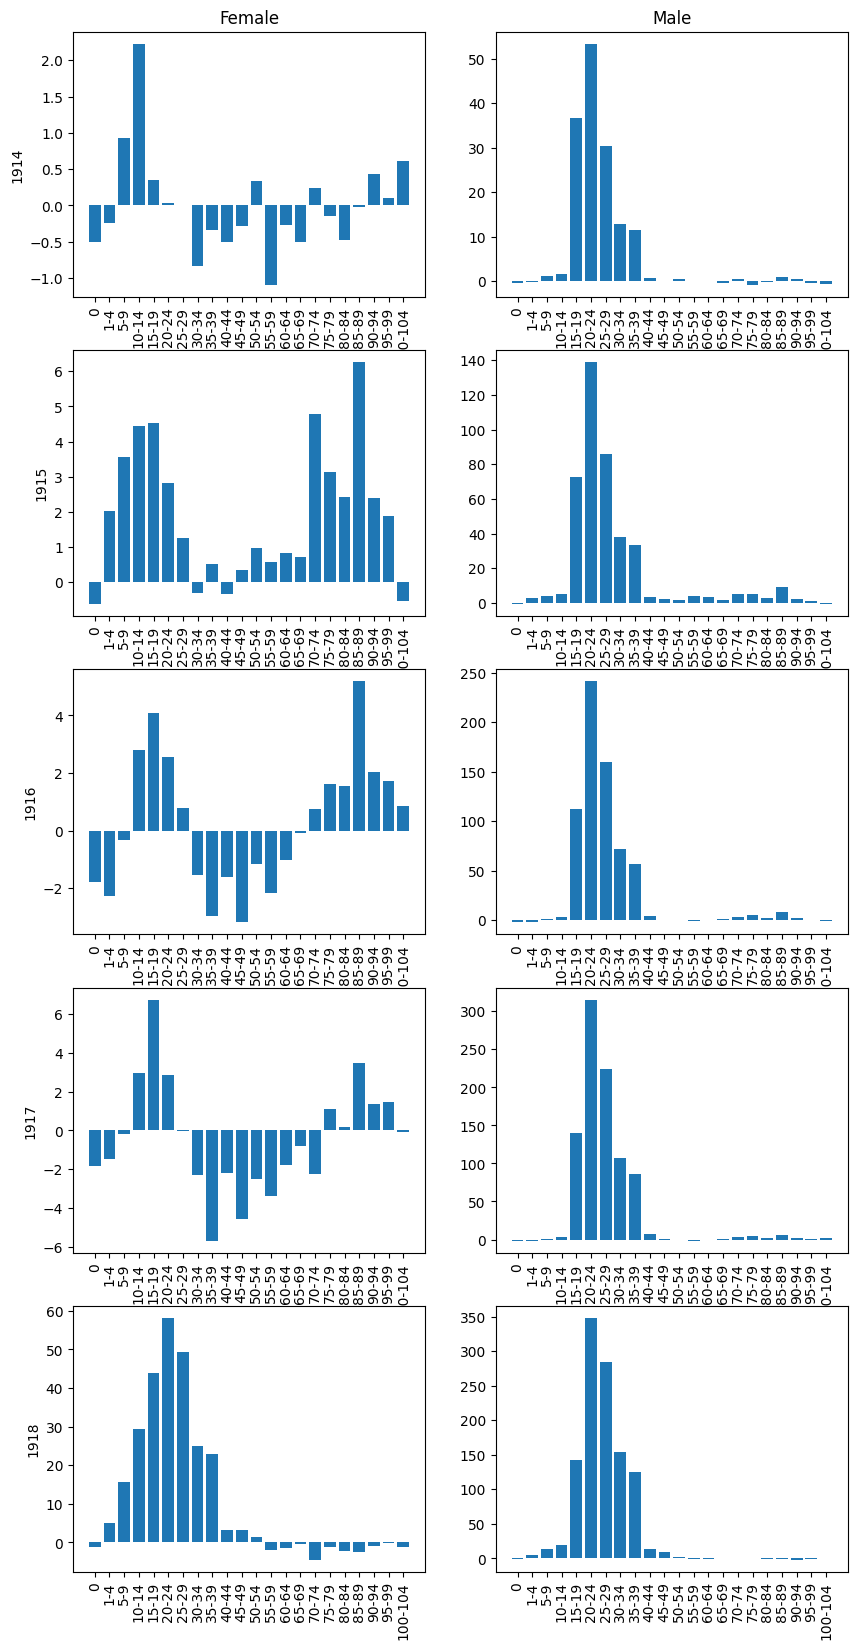

In [34]:
fig, ax = plt.subplots(5, 2, figsize = (10, 20))
#plt.ylim(-6, 100)

ax[0, 0].bar('Age', 'Female_Z', data = ww1[ww1.Year == 1914])
ax[0, 1].bar('Age', 'Male_Z', data = ww1[ww1.Year == 1914])
ax[0, 0].set_ylabel('1914')
ax[0, 0].set_title('Female')
ax[0, 1].set_title('Male')

ax[1, 0].bar('Age', 'Female_Z', data = ww1[ww1.Year == 1915])
ax[1, 1].bar('Age', 'Male_Z', data = ww1[ww1.Year == 1915])
ax[1, 0].set_ylabel('1915')

ax[2, 0].bar('Age', 'Female_Z', data = ww1[ww1.Year == 1916])
ax[2, 1].bar('Age', 'Male_Z', data = ww1[ww1.Year == 1916])
ax[2, 0].set_ylabel('1916')

ax[3, 0].bar('Age', 'Female_Z', data = ww1[ww1.Year == 1917])
ax[3, 1].bar('Age', 'Male_Z', data = ww1[ww1.Year == 1917])
ax[3, 0].set_ylabel('1917')


ax[4, 0].bar('Age', 'Female_Z', data = ww1[ww1.Year == 1918])
ax[4, 1].bar('Age', 'Male_Z', data = ww1[ww1.Year == 1918])
ax[4, 0].set_ylabel('1918')

for axis in ax:
    for position in axis:
        position.set_xticks(position.get_xticks())
        position.set_xticklabels(position.get_xticklabels(), rotation = 90)

plt.savefig('ww1.png', bbox_inches = 'tight')
plt.show()

In [35]:
ww1['Female_Z'].min()

-5.695803392676766

In [36]:
ww1['Male_Z'].max()

347.86552867156934

#### Let's try something else.

In [54]:
early_20th = df[['Year', 'Age', 'Female', 'Male']][(df.Year >= 1914) & (df.Year <= 1920)].copy()
early_20th

,Year,Age,Female,Male
1752,1914,0,98.204,124.492
1753,1914,1-4,14.935,15.720
1754,1914,5-9,3.394,3.434
1755,1914,10-14,2.178,2.062
1756,1914,15-19,2.706,7.802
...,...,...,...,...
1913,1920,80-84,132.469,158.980
1914,1920,85-89,202.037,235.705
1915,1920,90-94,266.612,328.968
1916,1920,95-99,376.638,425.548


In [55]:
early_20th['fem_comp_mean'] = [get_comparison(list(ww1_comparison), age, 'Female')[0] for age in early_20th.Age]
early_20th['fem_comp_std'] = [get_comparison(list(ww1_comparison), age, 'Female')[1] for age in early_20th.Age]
early_20th['Female_Z'] = [(val - mean) / std for val, mean, std in zip(early_20th.Female, early_20th.fem_comp_mean, early_20th.fem_comp_std)]

early_20th['mal_comp_mean'] = [get_comparison(list(ww1_comparison), age, 'Male')[0] for age in early_20th.Age]
early_20th['mal_comp_std'] = [get_comparison(list(ww1_comparison), age, 'Male')[1] for age in early_20th.Age]
early_20th['Male_Z'] = [(val - mean) / std for val, mean, std in zip(early_20th.Male, early_20th.mal_comp_mean, early_20th.mal_comp_std)]

early_20th

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
1752,1914,0,98.204,124.492,104.5478,12.468205,-0.508798,131.3456,13.798725,-0.496684
1753,1914,1-4,14.935,15.720,15.2386,1.239904,-0.244858,16.1160,1.251886,-0.316323
1754,1914,5-9,3.394,3.434,3.2372,0.169052,0.927526,3.2310,0.166348,1.220335
1755,1914,10-14,2.178,2.062,2.0302,0.066370,2.226914,1.9380,0.077874,1.592311
1756,1914,15-19,2.706,7.802,2.6794,0.076779,0.346448,2.9014,0.133765,36.635927
...,...,...,...,...,...,...,...,...,...,...
1913,1920,80-84,132.469,158.980,148.4066,7.254265,-2.196997,175.6192,7.972643,-2.087037
1914,1920,85-89,202.037,235.705,217.5328,5.610929,-2.761717,255.5298,5.041050,-3.932673
1915,1920,90-94,266.612,328.968,296.1402,17.008619,-1.736073,342.6292,25.928687,-0.526876
1916,1920,95-99,376.638,425.548,405.6142,41.408995,-0.699756,476.5160,85.452582,-0.596448


C:\Users\MGotham\AppData\Local\Temp\ipykernel_23632\2830838838.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(position.get_xticklabels(), rotation = 90)
C:\Users\MGotham\AppData\Local\Temp\ipykernel_23632\2830838838.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(position.get_xticklabels(), rotation = 90)


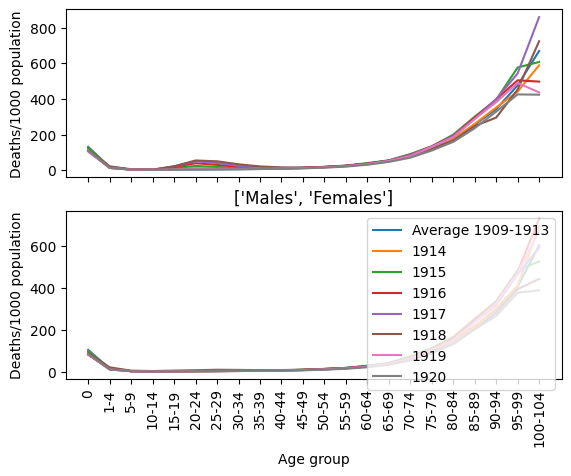

In [96]:
nineteen_fourteen = early_20th[early_20th['Year'] == 1914]
nineteen_fifteen = early_20th[early_20th['Year'] == 1915]
nineteen_sixteen = early_20th[early_20th['Year'] == 1916]
nineteen_seventeen = early_20th[early_20th['Year'] == 1917]
nineteen_eighteen = early_20th[early_20th['Year'] == 1918]
nineteen_nineteen = early_20th[early_20th['Year'] == 1919]
nineteen_twenty = early_20th[early_20th['Year'] == 1920]

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot('Age', 'mal_comp_mean', data = nineteen_eighteen)
ax1.plot('Age', 'Male', data = nineteen_fourteen)
ax1.plot('Age', 'Male', data = nineteen_fifteen)
ax1.plot('Age', 'Male', data = nineteen_sixteen)
ax1.plot('Age', 'Male', data = nineteen_seventeen)
ax1.plot('Age', 'Male', data = nineteen_eighteen)
ax1.plot('Age', 'Male', data = nineteen_nineteen)
ax1.plot('Age', 'Male', data = nineteen_twenty)

ax2.plot('Age', 'fem_comp_mean', data = nineteen_eighteen)
ax2.plot('Age', 'Female', data = nineteen_fourteen)
ax2.plot('Age', 'Female', data = nineteen_fifteen)
ax2.plot('Age', 'Female', data = nineteen_sixteen)
ax2.plot('Age', 'Female', data = nineteen_seventeen)
ax2.plot('Age', 'Female', data = nineteen_eighteen)
ax2.plot('Age', 'Female', data = nineteen_nineteen)
ax2.plot('Age', 'Female', data = nineteen_twenty)


ax1.set_xticklabels(position.get_xticklabels(), rotation = 90)
ax2.set_xticklabels(position.get_xticklabels(), rotation = 90)
#plt.ylim(0, 150)

ax2.set_xlabel('Age group')
ax1.set_ylabel('Deaths/1000 population')
ax2.set_ylabel('Deaths/1000 population')
plt.legend(['Average 1909-1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920'])

plt.title(['Males', 'Females'])

plt.savefig('both_ww1_plot.png', bbox_inches = 'tight')

plt.show()

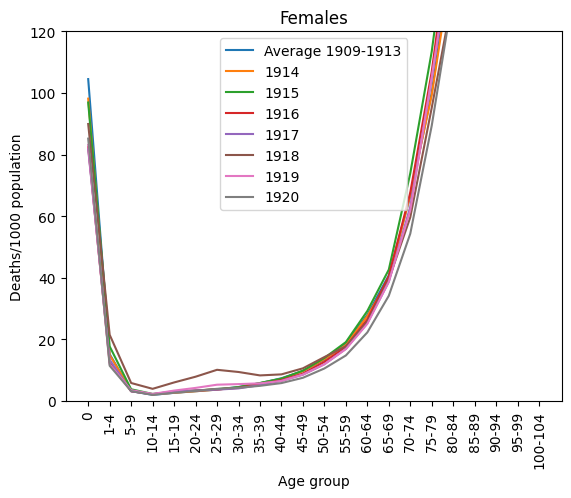

In [93]:
plt.plot('Age', 'fem_comp_mean', data = nineteen_eighteen)
plt.plot('Age', 'Female', data = nineteen_fourteen)
plt.plot('Age', 'Female', data = nineteen_fifteen)
plt.plot('Age', 'Female', data = nineteen_sixteen)
plt.plot('Age', 'Female', data = nineteen_seventeen)
plt.plot('Age', 'Female', data = nineteen_eighteen)
plt.plot('Age', 'Female', data = nineteen_nineteen)
plt.plot('Age', 'Female', data = nineteen_twenty)

plt.xticks(rotation = 90)
plt.ylim(0, 120)

plt.xlabel('Age group')
plt.ylabel('Deaths/1000 population')
plt.legend(['Average 1909-1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920'])
plt.title('Females')

plt.show()

In [39]:
age_bands

array(['0', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104'],
      dtype=object)

In [40]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

new_cols = []
for num in range(len(age_bands)):
    new_cols.append(alphabet[num] + "_" + age_bands[num])

new_cols

['a_0',
 'b_1-4',
 'c_5-9',
 'd_10-14',
 'e_15-19',
 'f_20-24',
 'g_25-29',
 'h_30-34',
 'i_35-39',
 'j_40-44',
 'k_45-49',
 'l_50-54',
 'm_55-59',
 'n_60-64',
 'o_65-69',
 'p_70-74',
 'q_75-79',
 'r_80-84',
 's_85-89',
 't_90-94',
 'u_95-99',
 'v_100-104']

In [41]:
early_20th.Age.replace(age_bands, new_cols, inplace = True)
early_20th

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
1752,1914,a_0,98.204,124.492,104.5478,12.468205,-0.508798,131.3456,13.798725,-0.496684
1753,1914,b_1-4,14.935,15.720,15.2386,1.239904,-0.244858,16.1160,1.251886,-0.316323
1754,1914,c_5-9,3.394,3.434,3.2372,0.169052,0.927526,3.2310,0.166348,1.220335
1755,1914,d_10-14,2.178,2.062,2.0302,0.066370,2.226914,1.9380,0.077874,1.592311
1756,1914,e_15-19,2.706,7.802,2.6794,0.076779,0.346448,2.9014,0.133765,36.635927
...,...,...,...,...,...,...,...,...,...,...
1913,1920,r_80-84,132.469,158.980,148.4066,7.254265,-2.196997,175.6192,7.972643,-2.087037
1914,1920,s_85-89,202.037,235.705,217.5328,5.610929,-2.761717,255.5298,5.041050,-3.932673
1915,1920,t_90-94,266.612,328.968,296.1402,17.008619,-1.736073,342.6292,25.928687,-0.526876
1916,1920,u_95-99,376.638,425.548,405.6142,41.408995,-0.699756,476.5160,85.452582,-0.596448


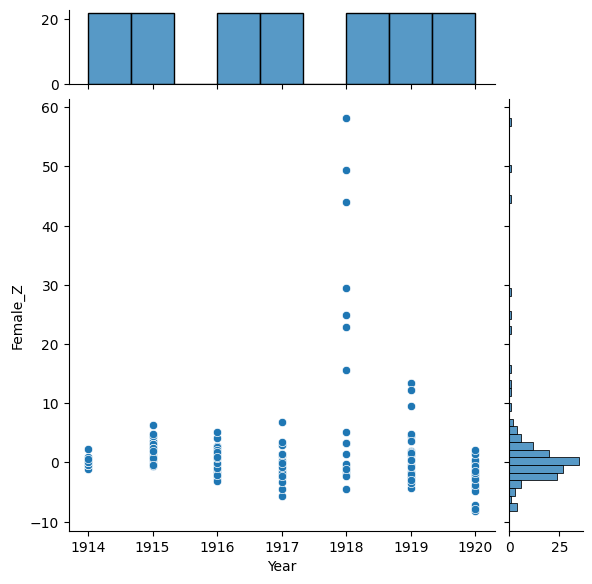

In [42]:
sns.jointplot(data = early_20th, x = "Year", y = "Female_Z", marginal_ticks=True)
plt.show()

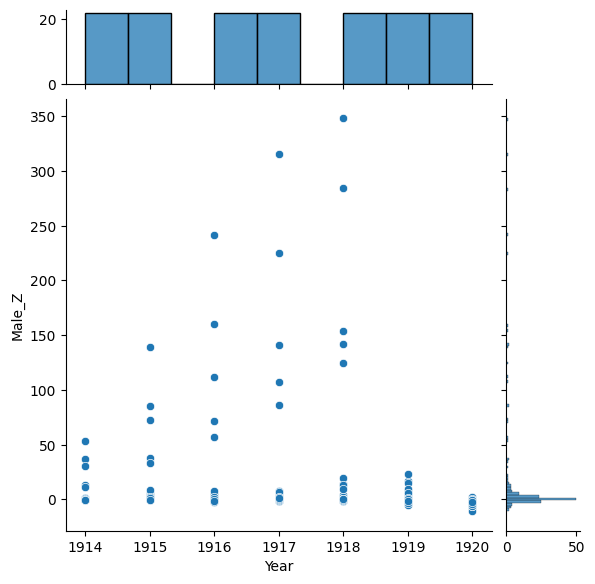

In [43]:
sns.jointplot(data = early_20th, x = "Year", y = "Male_Z", marginal_ticks=True)
plt.show()

In [44]:
def reds(val):
    if val >= 300:
        return "background-color: #800000"
    elif val >= 250:
        return "background-color: #990000"
    elif val >= 200:
        return "background-color: #b30000"
    elif val >= 150:
        return "background-color: #cc0000"
    elif val >= 100:
        return "background-color: #e60000"
    elif val >= 50:
        return "background-color: #ff0000"
    elif val >= 40:
        return "background-color: #a0a0a0"
    elif val >= 30:
        return "background-color: #aaaaaa"
    elif val >= 20:
        return "background-color: #b4b4b4"
    elif val >= 10:
        return "background-color: #bebebe"
    elif val >= 8:
        return "background-color: #c8c8c8"
    elif val >= 6:
        return "background-color: #d2d2d2"
    elif val >= 4:
        return "background-color: #dcdcdc"
    elif val >= 2:
        return "background-color: #e6e6e6"
    else:
        return "background-color: white"

In [46]:
female_ww1_tab = pd.crosstab(early_20th.Age, early_20th.Year, values = early_20th.Female_Z, aggfunc = 'sum')#, rownames = age_bands)
female_ww1_tab_style = female_ww1_tab.style.applymap(reds)

dfi.export(female_ww1_tab_style, 'early_20th_female.png')

In [47]:
male_ww1_tab = pd.crosstab(early_20th.Age, early_20th.Year, values = early_20th.Male_Z, aggfunc = 'sum')
male_ww1_tab_style = male_ww1_tab.style.applymap(reds)

dfi.export(male_ww1_tab_style, 'early_20th_male.png')

In [48]:
type(male_ww1_tab)

pandas.core.frame.DataFrame

In [49]:
# Second World War
ww2 = df[['Year', 'Age', 'Female', 'Male']][(df.Year >= ww2_years[0]) & (df.Year <= ww2_years[-1])].copy()
ww2

,Year,Age,Female,Male
2352,1939,0,45.571,58.433
2353,1939,1-4,3.256,3.719
2354,1939,5-9,1.311,1.646
2355,1939,10-14,0.971,1.079
2356,1939,15-19,1.668,1.944
...,...,...,...,...
2513,1945,80-84,119.777,153.305
2514,1945,85-89,188.501,235.052
2515,1945,90-94,275.549,331.924
2516,1945,95-99,380.964,461.540


In [50]:
ww2['fem_comp_mean'] = [get_comparison(list(ww2_comparison), age, 'Female')[0] for age in ww2.Age]
ww2['fem_comp_std'] = [get_comparison(list(ww2_comparison), age, 'Female')[1] for age in ww2.Age]
ww2['Female_Z'] = [(val - mean) / std for val, mean, std in zip(ww2.Female, ww2.fem_comp_mean, ww2.fem_comp_std)]

ww2['mal_comp_mean'] = [get_comparison(list(ww2_comparison), age, 'Male')[0] for age in ww2.Age]
ww2['mal_comp_std'] = [get_comparison(list(ww2_comparison), age, 'Male')[1] for age in ww2.Age]
ww2['Male_Z'] = [(val - mean) / std for val, mean, std in zip(ww2.Male, ww2.mal_comp_mean, ww2.mal_comp_std)]

ww2

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
2352,1939,0,45.571,58.433,51.7152,2.281699,-2.692817,67.6260,2.826436,-3.252506
2353,1939,1-4,3.256,3.719,5.0628,0.667977,-2.704884,5.6472,0.697573,-2.764156
2354,1939,5-9,1.311,1.646,1.9472,0.226029,-2.814687,2.1318,0.190718,-2.547216
2355,1939,10-14,0.971,1.079,1.2130,0.128415,-1.884516,1.3220,0.088061,-2.759440
2356,1939,15-19,1.668,1.944,1.8980,0.140941,-1.631887,2.1330,0.101424,-1.863467
...,...,...,...,...,...,...,...,...,...,...
2513,1945,80-84,119.777,153.305,135.2122,5.282121,-2.922159,171.6560,4.808251,-3.816564
2514,1945,85-89,188.501,235.052,209.3722,7.798235,-2.676400,260.0020,8.709187,-2.864791
2515,1945,90-94,275.549,331.924,299.7516,15.743437,-1.537314,356.0406,18.476656,-1.305247
2516,1945,95-99,380.964,461.540,418.4086,30.760484,-1.217296,477.0346,37.904502,-0.408780


In [51]:
ww2.Age.replace(age_bands, new_cols, inplace = True)
ww2

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
2352,1939,a_0,45.571,58.433,51.7152,2.281699,-2.692817,67.6260,2.826436,-3.252506
2353,1939,b_1-4,3.256,3.719,5.0628,0.667977,-2.704884,5.6472,0.697573,-2.764156
2354,1939,c_5-9,1.311,1.646,1.9472,0.226029,-2.814687,2.1318,0.190718,-2.547216
2355,1939,d_10-14,0.971,1.079,1.2130,0.128415,-1.884516,1.3220,0.088061,-2.759440
2356,1939,e_15-19,1.668,1.944,1.8980,0.140941,-1.631887,2.1330,0.101424,-1.863467
...,...,...,...,...,...,...,...,...,...,...
2513,1945,r_80-84,119.777,153.305,135.2122,5.282121,-2.922159,171.6560,4.808251,-3.816564
2514,1945,s_85-89,188.501,235.052,209.3722,7.798235,-2.676400,260.0020,8.709187,-2.864791
2515,1945,t_90-94,275.549,331.924,299.7516,15.743437,-1.537314,356.0406,18.476656,-1.305247
2516,1945,u_95-99,380.964,461.540,418.4086,30.760484,-1.217296,477.0346,37.904502,-0.408780


In [52]:
female_ww2_tab = pd.crosstab(ww2.Age, ww2.Year, values = ww2.Female_Z, aggfunc = 'sum')
female_ww2_tab_style = female_ww2_tab.style.applymap(reds)

dfi.export(female_ww2_tab_style, 'ww2_female.png')

In [53]:
male_ww2_tab = pd.crosstab(ww2.Age, ww2.Year, values = ww2.Male_Z, aggfunc = 'sum')
male_ww2_tab_style = male_ww2_tab.style.applymap(reds)

dfi.export(male_ww2_tab_style, 'ww2_male.png')

In [99]:
# COVID-19
covid = df[['Year', 'Age', 'Female', 'Male']][df.Year == 2020].copy()
covid

,Year,Age,Female,Male
4296,2020,0,3.430,4.142
4297,2020,1-4,0.105,0.132
4298,2020,5-9,0.042,0.075
4299,2020,10-14,0.072,0.085
4300,2020,15-19,0.149,0.263
4301,2020,20-24,0.193,0.463
4302,2020,25-29,0.276,0.580
4303,2020,30-34,0.460,0.818
4304,2020,35-39,0.753,1.247
4305,2020,40-44,1.142,1.868


In [100]:
covid['fem_comp_mean'] = [get_comparison(list(covid_comparison), age, 'Female')[0] for age in covid.Age]
covid['fem_comp_std'] = [get_comparison(list(covid_comparison), age, 'Female')[1] for age in covid.Age]
covid['Female_Z'] = [(val - mean) / std for val, mean, std in zip(covid.Female, covid.fem_comp_mean, covid.fem_comp_std)]

covid['mal_comp_mean'] = [get_comparison(list(covid_comparison), age, 'Male')[0] for age in covid.Age]
covid['mal_comp_std'] = [get_comparison(list(covid_comparison), age, 'Male')[1] for age in covid.Age]
covid['Male_Z'] = [(val - mean) / std for val, mean, std in zip(covid.Male, covid.mal_comp_mean, covid.mal_comp_std)]

covid

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
4296,2020,0,3.430,4.142,3.4930,0.077271,-0.815313,4.2870,0.085951,-1.687005
4297,2020,1-4,0.105,0.132,0.1350,0.012665,-2.368749,0.1506,0.013185,-1.410711
4298,2020,5-9,0.042,0.075,0.0680,0.005899,-4.407413,0.0760,0.006164,-0.162221
4299,2020,10-14,0.072,0.085,0.0746,0.005161,-0.503740,0.1004,0.006888,-2.235879
4300,2020,15-19,0.149,0.263,0.1668,0.008424,-2.113067,0.3010,0.020080,-1.892445
4301,2020,20-24,0.193,0.463,0.2084,0.011002,-1.399769,0.4992,0.025047,-1.445274
4302,2020,25-29,0.276,0.580,0.2822,0.010815,-0.573288,0.6034,0.018683,-1.252502
4303,2020,30-34,0.460,0.818,0.4358,0.015917,1.520360,0.8116,0.026326,0.243109
4304,2020,35-39,0.753,1.247,0.6754,0.016231,4.781023,1.1454,0.017048,5.959585
4305,2020,40-44,1.142,1.868,1.0414,0.013894,7.240596,1.7254,0.060662,2.350742


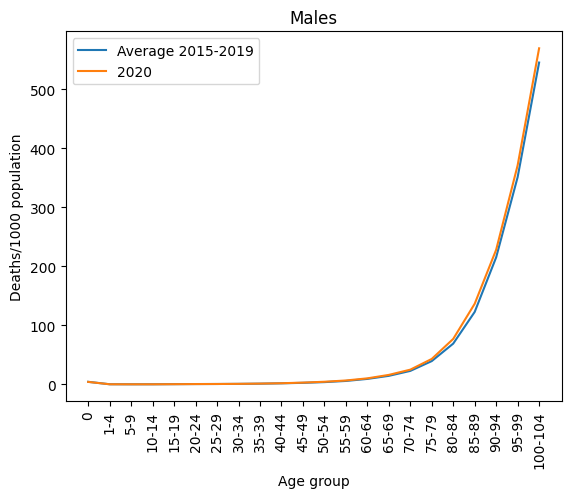

In [103]:
plt.plot('Age', 'mal_comp_mean', data = covid)
plt.plot('Age', 'Male', data = covid)

plt.xticks(rotation = 90)
#plt.ylim(0, 20)

plt.xlabel('Age group')
plt.ylabel('Deaths/1000 population')
plt.legend(['Average 2015-2019', '2020'])
plt.title('Males')

plt.show()

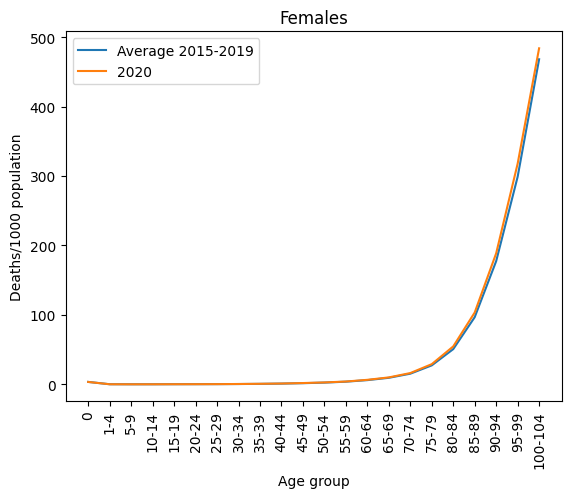

In [104]:
plt.plot('Age', 'fem_comp_mean', data = covid)
plt.plot('Age', 'Female', data = covid)

plt.xticks(rotation = 90)
#plt.ylim(0, 20)

plt.xlabel('Age group')
plt.ylabel('Deaths/1000 population')
plt.legend(['Average 2015-2019', '2020'])
plt.title('Females')

plt.show()

In [88]:
covid.Age.replace(age_bands, new_cols, inplace = True)
covid

,Year,Age,Female,Male,fem_comp_mean,fem_comp_std,Female_Z,mal_comp_mean,mal_comp_std,Male_Z
4296,2020,a_0,3.430,4.142,3.4930,0.077271,-0.815313,4.2870,0.085951,-1.687005
4297,2020,b_1-4,0.105,0.132,0.1350,0.012665,-2.368749,0.1506,0.013185,-1.410711
4298,2020,c_5-9,0.042,0.075,0.0680,0.005899,-4.407413,0.0760,0.006164,-0.162221
4299,2020,d_10-14,0.072,0.085,0.0746,0.005161,-0.503740,0.1004,0.006888,-2.235879
4300,2020,e_15-19,0.149,0.263,0.1668,0.008424,-2.113067,0.3010,0.020080,-1.892445
4301,2020,f_20-24,0.193,0.463,0.2084,0.011002,-1.399769,0.4992,0.025047,-1.445274
4302,2020,g_25-29,0.276,0.580,0.2822,0.010815,-0.573288,0.6034,0.018683,-1.252502
4303,2020,h_30-34,0.460,0.818,0.4358,0.015917,1.520360,0.8116,0.026326,0.243109
4304,2020,i_35-39,0.753,1.247,0.6754,0.016231,4.781023,1.1454,0.017048,5.959585
4305,2020,j_40-44,1.142,1.868,1.0414,0.013894,7.240596,1.7254,0.060662,2.350742


In [97]:
female_covid_tab = pd.crosstab(covid.Age, covid.Year, values = covid.Female_Z, aggfunc = 'sum')
female_covid_tab_style = female_covid_tab.style.applymap(reds)

dfi.export(female_covid_tab_style, 'covid_female.png')

In [98]:
male_covid_tab = pd.crosstab(covid.Age, covid.Year, values = covid.Male_Z, aggfunc = 'sum')
male_covid_tab_style = male_covid_tab.style.applymap(reds)

dfi.export(male_covid_tab_style, 'covid_male.png')

In [105]:
df[(df.Year > 2014) & (df.Age == '55-59')]

,Year,Age,Female,Male,Total
4188,2015,55-59,3.819,5.807,4.802
4212,2016,55-59,3.998,5.761,4.870
4236,2017,55-59,3.676,5.726,4.689
4260,2018,55-59,3.865,5.753,4.796
4284,2019,55-59,3.696,5.685,4.676
4308,2020,55-59,4.027,6.529,5.258
